In [1]:
cd "../fiberphotopy/"

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [13]:
import fiber_data
import fp_utils
import behavioral_data
import analysis
import os

import importlib
def rel():
    for m in [fiber_data,fp_utils,behavioral_data,analysis]:
        importlib.reload(m)
        
rel()

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib import colors

In [33]:
corr = pd.read_csv('../../DATA/nicotine/data_sheet_summary.csv',sep=';')
corr['real_cage'] = [a.split(' ')[1][1:-1] for a in corr['cage']]
corr

Rat   Group Subgroup      cage  jour  session        date real_cage
0      1    Nico  DISCONN    1 (1a)    39        1  12/04/2019        1a
1      2  Saline  DISCONN    2 (2a)    39        1  12/04/2019        2a
2      3    Nico       DR    3 (3a)    39        1  12/04/2019        3a
3      4    Nico       DR    4 (4a)    39        1  12/04/2019        4a
4      5    Nico  DISCONN    5 (5a)    39        1  12/04/2019        5a
..   ...     ...      ...       ...   ...      ...         ...       ...
345   69    Nico  DISCONN   31 (7c)    35        2  08/04/2019        7c
346   70    Nico  DISCONN   32 (8c)    35        2  08/04/2019        8c
347   71    Nico  DISCONN   33 (9c)    35        2  08/04/2019        9c
348   74    Nico       DR  34 (10c)    35        2  08/04/2019       10c
349   75    Nico       DR  35 (11c)    35        2  08/04/2019       11c

[350 rows x 8 columns]

rel()
nico = behavioral_data.MultiBehavior('../../DATA/nicotine/AD19R/')

nico.np1

{k:type(v) for k,v in nico.__dict__.items()}

for name,obj in nico.sessions.items():
    for attr,val in obj.__dict__.items():
        print(attr)

In [36]:
filenames = [a.split('/')[-1] for a in nico.sessions.keys()]
file_session = [int(a.split('s')[-1].split('.dat')[0][0]) for a in filenames]
file_cage_num = [str(int(a.split('s')[-1].split('.dat')[0].split('_')[0].split('c')[-1])) for a in filenames]
file_cage_letter = [a.split('\\')[-1][0] for a in filenames]
file_cage = [a+b for a,b in zip(file_cage_num,file_cage_letter)]
file_day = [int(a.split('\\')[0].split(' ')[1]) for a in filenames]
file_rat = [int(a.split('_')[-1].split('.dat')[0].upper().split('RAT')[1]) for a in filenames]
corr_df = pd.DataFrame({'filename':filenames,
                        'file_session':file_session,
                       'file_cage':file_cage,
                       'file_day':file_day,
                       'file_rat':file_rat})
corr_df

filename  file_session file_cage  \
0     Session 35\asa08042019s1c01_01_rat1.dat             1        1a   
1     Session 35\asa08042019s1c05_01_rat5.dat             1        5a   
2     Session 35\asa08042019s1c07_01_rat7.dat             1        7a   
3    Session 35\asa08042019s1c12_01_rat12.dat             1       12a   
4    Session 35\asa08042019s1c13_01_rat13.dat             1       13a   
..                                        ...           ...       ...   
105     Session 39\csa12042019s1c03_Rat29.dat             1        3c   
106     Session 39\csa12042019s1c04_Rat30.dat             1        4c   
107     Session 39\csa12042019s1c07_Rat33.dat             1        7c   
108     Session 39\csa12042019s1c08_Rat70.dat             1        8c   
109     Session 39\csa12042019s1c11_Rat37.dat             1       11c   

     file_day  file_rat  
0          35         1  
1          35         5  
2          35         7  
3          35        12  
4          35        13  
..        ...       ...  
105        39        29  
106        39        30  
107        39        33  
108        39        70  
109        39        37  

[110 rows x 5 columns]

In [8]:
scd = zip(corr_df['file_session'],corr_df['file_cage'],corr_df['file_day'])
detected_rat = [corr[(corr['session']==s) & (corr['real_cage']==c) & (corr['jour']==d)]['Rat'].to_numpy()[0] for s,c,d in scd]
match = ['ok' if a==b else 'ERROR' for a,b in zip(corr_df['file_rat'],detected_rat)]
result_df = corr_df.copy()
result_df['detected_rat'] = detected_rat
result_df['match'] = match

result_df.sort_values(['match','detected_rat'])

filename  file_session file_cage  file_day  \
44    Session 37\asa10042019s1c01_Rat5.dat             1        1a        37   
16   Session 35\csa08042019s1c02_rat64.dat             1        2c        35   
38   Session 36\csa09042019s1c02_Rat64.dat             1        2c        36   
60   Session 37\csa10042019s1c02_Rat64.dat             1        2c        37   
82   Session 38\csa11042019s1c02_Rat64.dat             1        2c        38   
..                                     ...           ...       ...       ...   
14   Session 35\bsa08042019s2c08_rat62.dat             2        8b        35   
36   Session 36\bsa09042019s2c08_Rat62.dat             2        8b        36   
58   Session 37\bsa10042019s2c08_Rat62.dat             2        8b        37   
80   Session 38\bsa11042019s2c08_Rat62.dat             2        8b        38   
102  Session 39\bsa12042019s2c08_Rat62.dat             2        8b        39   

     file_rat  detected_rat  match  
44          5             1  ERROR  
16         64            27  ERROR  
38         64            27  ERROR  
60         64            27  ERROR  
82         64            27  ERROR  
..        ...           ...    ...  
14         62            62     ok  
36         62            62     ok  
58         62            62     ok  
80         62            62     ok  
102        62            62     ok  

[110 rows x 7 columns]

In [37]:
selection = corr[corr['Rat'].isin(file_rat)].copy()

In [38]:
selection

Rat Group Subgroup      cage  jour  session        date real_cage
0      1  Nico  DISCONN    1 (1a)    39        1  12/04/2019        1a
4      5  Nico  DISCONN    5 (5a)    39        1  12/04/2019        5a
6      7  Nico  DISCONN    7 (7a)    39        1  12/04/2019        7a
11    12  Nico  DISCONN  12 (12a)    39        1  12/04/2019       12a
12    13  Nico  DISCONN  13 (13a)    39        1  12/04/2019       13a
..   ...   ...      ...       ...   ...      ...         ...       ...
328   52  Nico  DISCONN  14 (14a)    35        2  08/04/2019       14a
332   56  Nico  DISCONN   18 (2b)    35        2  08/04/2019        2b
338   62  Nico  DISCONN   24 (8b)    35        2  08/04/2019        8b
340   64  Nico  DISCONN   26 (2c)    35        2  08/04/2019        2c
346   70  Nico  DISCONN   32 (8c)    35        2  08/04/2019        8c

[110 rows x 8 columns]

In [39]:
datafolder_server = r'S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas\Rats\2019\Nicotine\AD19R - Var + Nic-CueOm\Datas Brutes'
selected_folders = [datafolder_server+'\\'+a for a in os.listdir(datafolder_server) if a in ['J3'+str(i) for i in range(5,10)]]
subfolders = [b for c in [[a+'\\'+i for i in os.listdir(a)] for a in selected_folders] for b in c]
allfiles =  [d for d in [b for c in [[a+'\\'+i for i in os.listdir(a)] for a in subfolders] for b in c] if '.dat' in d]
allinfo = [a.split('\\J')[-1] for a in allfiles]
#day
allday = [int(a[:2]) for a in allinfo]
#cage_letter
all_cage_letter = [a.split('\\')[0][-1] for a in allinfo]
#cage_number
all_cage_number = [int(a.split('2019s')[-1].split('c')[-1].split('.dat')[0].split('_')[0]) for a in allinfo]
#cage_name
all_cage_name = [str(a)+b for a,b in zip(all_cage_number,all_cage_letter)]
#session
all_session = [int(a.split('2019s')[-1].split('c')[0]) for a in allinfo]
alldf = pd.DataFrame({'path'      : allfiles,
                      'name'      : allinfo,
                      'cage_name' : all_cage_name,
                      'cage_num'  : all_cage_number,
                     'cage_letter': all_cage_letter,
                      'day'       : allday,
                      'session'   : all_session})
alldf

path  \
0    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
1    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
2    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
3    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
4    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
..                                                 ...   
345  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
346  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
347  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
348  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
349  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   

                            name cage_name  cage_num cage_letter  day  session  
0    35a\asa08042019s1c01_01.dat        1a         1           a   35        1  
1    35a\asa08042019s1c02_01.dat        2a         2           a   35        1  
2    35a\asa08042019s1c03_01.dat        3a         3           a   35        1  
3    35a\asa08042019s1c04_01.dat        4a         4           a   35        1  
4    35a\asa08042019s1c05_01.dat        5a         5           a   35        1  
..                           ...       ...       ...         ...  ...      ...  
345  39c\csa12042019s2c07_01.dat        7c         7           c   39        2  
346  39c\csa12042019s2c08_01.dat        8c         8           c   39        2  
347  39c\csa12042019s2c09_01.dat        9c         9           c   39        2  
348  39c\csa12042019s2c10_01.dat       10c        10           c   39        2  
349  39c\csa12042019s2c11_01.dat       11c        11           c   39        2  

[350 rows x 7 columns]

In [40]:
selection

Rat Group Subgroup      cage  jour  session        date real_cage
0      1  Nico  DISCONN    1 (1a)    39        1  12/04/2019        1a
4      5  Nico  DISCONN    5 (5a)    39        1  12/04/2019        5a
6      7  Nico  DISCONN    7 (7a)    39        1  12/04/2019        7a
11    12  Nico  DISCONN  12 (12a)    39        1  12/04/2019       12a
12    13  Nico  DISCONN  13 (13a)    39        1  12/04/2019       13a
..   ...   ...      ...       ...   ...      ...         ...       ...
328   52  Nico  DISCONN  14 (14a)    35        2  08/04/2019       14a
332   56  Nico  DISCONN   18 (2b)    35        2  08/04/2019        2b
338   62  Nico  DISCONN   24 (8b)    35        2  08/04/2019        8b
340   64  Nico  DISCONN   26 (2c)    35        2  08/04/2019        2c
346   70  Nico  DISCONN   32 (8c)    35        2  08/04/2019        8c

[110 rows x 8 columns]

In [41]:
cjs = zip(selection.real_cage,selection.jour,selection.session)
selection['path'] = [alldf[(alldf['cage_name']==c) & (alldf['day']==j) & (alldf['session']==s)]['path'].values[0] for c,j,s in cjs]
selection['filename'] = [p.split('Datas Brutes\\')[-1] for p in selection['path']]

In [42]:
cluster_df = pd.read_csv('../../DATA/nicotine/Rats_Clusters.csv',delimiter=';',index_col='Rat')
selection['cluster'] = [cluster_df.loc[i,'Cluster'] for i in selection.Rat]

In [43]:
selection['objects'] = [behavioral_data.BehavioralData(p) for p in selection['path']]

10:02:21 --- IMPORTING S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas\Rats\2019\Nicotine\AD19R - Var + Nic-CueOm\Datas Brutes\J39\J39a\asa12042019s1c01_01.dat...
10:02:21 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:21 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:21 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:21 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:21 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:21 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:21 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:21 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:21 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:21 --- Detect

10:02:21 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:21 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:21 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:21 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:21 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:21 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:21 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:21 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:21 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:21 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:21 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'l

10:02:21 --- Detecting hled_on_start...                ['boundary', 'start', 'HLED_ON'])
10:02:21 --- Detecting hled_on_end...                  ['boundary', 'end', 'HLED_ON'])
10:02:21 --- Detecting switch_d_nd...                  ['iselement', 'hled_on_start', 'LED2_ON'])
10:02:21 --- Detecting switch_to_nd...                 ['iselement', 'hled_on_start', 'TIMEOUT'])
10:02:21 --- Detecting switch_dto_nd...                ['combination', ['switch_d_nd', 'switch_to_nd']])
10:02:21 --- Detecting switch_nd_d...                  ['iselement', 'hled_on_end', 'LED2_ON'])
10:02:21 --- Detecting switch_between...               ['timerestricted', 'switch_dto_nd', [100, 3400]])
10:02:21 --- Detecting switch_1...                     ['indexed', 'switch_between', 1])
10:02:21 --- Detecting np_effective...                 ['iselement', 'np1', '~TIMEOUT'])
10:02:21 --- Detecting np1_n...                        ['generative', 'np_effective', 5])
10:02:21 --- Detecting D_n...                         

10:02:22 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:22 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:22 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'led2_off']])
10:02:22 --- Detecting TTL1...                         ['ON_OFF', 'both', ['ttl1_on', 'ttl1_off']])
10:02:22 --- Detecting rec_start...                    ['indexed', 'ttl1_on', 1])
10:02:22 --- Detecting DARK...                         ['INTERSECTION', ['HLED_OFF', 'LED1_OFF', 'LED2_OFF']])
10:02:22 --- Detecting DNI...                          ['NEAR_EVENT', 'DARK', 'inj1', 5])
10:02:22 --- Detecting TO_DARK...                      ['DURATION', 'DNI', '<', 45])
10:02:22 --- Detecting TIMEOUT...                      ['UNION', ['LED1_ON', 'TO_DARK']])
10:02:22 --- Detecting NOTO_DARK...                    ['INTERSECTION', ['DARK', '~TIMEOUT']])
10:02:22 --- Detecting hled_on_start...        

10:02:22 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:22 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:22 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:22 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:22 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:22 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:22 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:22 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:22 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:22 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:22 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:

10:02:22 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'led2_off']])
10:02:22 --- Detecting TTL1...                         ['ON_OFF', 'both', ['ttl1_on', 'ttl1_off']])
10:02:22 --- Detecting rec_start...                    ['indexed', 'ttl1_on', 1])
10:02:22 --- Detecting DARK...                         ['INTERSECTION', ['HLED_OFF', 'LED1_OFF', 'LED2_OFF']])
10:02:22 --- Detecting DNI...                          ['NEAR_EVENT', 'DARK', 'inj1', 5])
10:02:22 --- Detecting TO_DARK...                      ['DURATION', 'DNI', '<', 45])
10:02:22 --- Detecting TIMEOUT...                      ['UNION', ['LED1_ON', 'TO_DARK']])
10:02:22 --- Detecting NOTO_DARK...                    ['INTERSECTION', ['DARK', '~TIMEOUT']])
10:02:22 --- Detecting hled_on_start...                ['boundary', 'start', 'HLED_ON'])
10:02:22 --- Detecting hled_on_end...                  ['boundary', 'end', 'HLED_ON'])
10:02:22 --- Detecting switch_d_nd...                  ['iselement', 'h

10:02:22 --- Detecting np1_n...                        ['generative', 'np_effective', 5])
10:02:22 --- Detecting D_n...                          ['GENERATIVE', 'HLED_OFF'])
10:02:22 --- Detecting ND_n...                         ['GENERATIVE', 'HLED_ON'])
10:02:22 --- Importing finished in 0.054 seconds

10:02:22 --- IMPORTING S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas\Rats\2019\Nicotine\AD19R - Var + Nic-CueOm\Datas Brutes\J38\J38a\asa11042019s1c07_01.dat...
10:02:22 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:22 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:22 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:22 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:22 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:22 --- Detecting led2_off...                     ['conditional', [1, 3],

10:02:22 --- Detecting D_n...                          ['GENERATIVE', 'HLED_OFF'])
10:02:22 --- Detecting ND_n...                         ['GENERATIVE', 'HLED_ON'])
10:02:22 --- Importing finished in 0.052 seconds

10:02:22 --- IMPORTING S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas\Rats\2019\Nicotine\AD19R - Var + Nic-CueOm\Datas Brutes\J38\J38b\bsa11042019s1c04_01.dat...
10:02:22 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:22 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:22 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:22 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:22 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:22 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:22 --- Detecting np1...                          ['conditional', [3, 1]

10:02:23 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:23 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:23 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:23 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:23 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:23 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:23 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:23 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'led2_off']])
10:02:23 --- Detecting TTL1...                         ['ON_OFF', 'both', ['ttl

10:02:23 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:23 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:23 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:23 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:23 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:23 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:23 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:23 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:23 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'l

10:02:23 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:23 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:23 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:23 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:23 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:23 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:23 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:23 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:23 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]

10:02:23 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:23 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:23 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:23 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'led2_off']])
10:02:23 --- Detecting TTL1...                         ['ON_OFF', 'both', ['ttl1_on', 'ttl1_off']])
10:02:23 --- Detecting rec_start...                    ['indexed', 'ttl1_on', 1])
10:02:23 --- Detecting DARK...                         ['INTERSECTION', ['HLED_OFF', 'LED1_OFF', 'LED2_OFF']])
10:02:23 --- Detecting DNI...                          ['NEAR_EVENT', 'DARK', 'inj1', 5])
10:02:23 --- Detecting TO_DARK...                      ['DURATION', 'DNI', '<', 45])
10:02:23 --- Detecting TIMEOUT...                      ['UNION', ['LED1_ON', 'TO_DARK']])
10:02:23 --- Detecting NOTO_DARK...                    ['IN

10:02:23 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:23 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:23 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:23 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:23 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:23 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:23 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:23 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:23 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:23 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]

10:02:24 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:24 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:24 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:24 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:24 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:24 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:24 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:24 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:24 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:

10:02:24 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:24 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:24 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:24 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:24 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:24 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'led2_off']])
10:02:24 --- Detecting TTL1...                         ['ON_OFF', 'both', ['ttl1_on', 'ttl1_off']])
10:02:24 --- Detecting rec_start...                    ['indexed', 'ttl1_on', 1])
10:02:24 --- Detecting DARK...                         ['INTERSECTION', ['HLED_OFF', 'LED1_OFF', 'LED2_OFF']])
10:02:24 --- Detecting DNI...                          ['NE

10:02:24 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:24 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:24 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:24 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:24 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:24 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:24 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:24 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:24 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']

10:02:24 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:24 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:24 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:24 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:24 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:24 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:24 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:24 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:24 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:24 --- De

10:02:24 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:24 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:24 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:24 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:24 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:24 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:24 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:24 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:24 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:24 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:2

10:02:25 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:25 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:25 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:25 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:25 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:25 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:25 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:25 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:25 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:2

10:02:25 --- Detecting DNI...                          ['NEAR_EVENT', 'DARK', 'inj1', 5])
10:02:25 --- Detecting TO_DARK...                      ['DURATION', 'DNI', '<', 45])
10:02:25 --- Detecting TIMEOUT...                      ['UNION', ['LED1_ON', 'TO_DARK']])
10:02:25 --- Detecting NOTO_DARK...                    ['INTERSECTION', ['DARK', '~TIMEOUT']])
10:02:25 --- Detecting hled_on_start...                ['boundary', 'start', 'HLED_ON'])
10:02:25 --- Detecting hled_on_end...                  ['boundary', 'end', 'HLED_ON'])
10:02:25 --- Detecting switch_d_nd...                  ['iselement', 'hled_on_start', 'LED2_ON'])
10:02:25 --- Detecting switch_to_nd...                 ['iselement', 'hled_on_start', 'TIMEOUT'])
10:02:25 --- Detecting switch_dto_nd...                ['combination', ['switch_d_nd', 'switch_to_nd']])
10:02:25 --- Detecting switch_nd_d...                  ['iselement', 'hled_on_end', 'LED2_ON'])
10:02:25 --- Detecting switch_between...               ['timerestri

10:02:25 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:25 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:25 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:25 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:25 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:25 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:25 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:25 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:25 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:2

10:02:25 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:25 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:25 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:25 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:25 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:25 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:25 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:25 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:25 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:

10:02:25 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:25 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:25 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'led2_off']])
10:02:25 --- Detecting TTL1...                         ['ON_OFF', 'both', ['ttl1_on', 'ttl1_off']])
10:02:25 --- Detecting rec_start...                    ['indexed', 'ttl1_on', 1])
10:02:25 --- Detecting DARK...                         ['INTERSECTION', ['HLED_OFF', 'LED1_OFF', 'LED2_OFF']])
10:02:25 --- Detecting DNI...                          ['NEAR_EVENT', 'DARK', 'inj1', 5])
10:02:25 --- Detecting TO_DARK...                      ['DURATION', 'DNI', '<', 45])
10:02:25 --- Detecting TIMEOUT...                      ['UNION', ['LED1_ON', 'TO_DARK']])
10:02:25 --- Detecting NOTO_DARK...                    ['INTERSECTION', ['DARK', '~TIMEOUT']])
10:02:25 --- Detecting hled_on_start...        

10:02:25 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:25 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:25 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:25 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:25 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:25 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:25 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:25 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:25 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:25 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:2

10:02:26 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:26 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:26 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:26 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:26 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:26 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:26 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:26 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:26 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:2

10:02:26 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:26 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:26 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:26 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:26 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:26 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:26 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:26 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:26 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]

10:02:26 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:26 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:26 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:26 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:26 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:26 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:26 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:26 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:26 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:

10:02:26 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:26 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:26 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:26 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:26 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:26 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:26 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:26 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:26 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:26 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]

10:02:27 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
10:02:27 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
10:02:27 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
10:02:27 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:27 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:27 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:27 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:27 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:27 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:27 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:27 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]

10:02:27 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:27 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:27 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:27 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:27 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:27 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:27 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:27 --- Detecting LED1...                         ['ON_OFF', 'both', ['led1_on', 'led1_off']])
10:02:27 --- Detecting LED2...                         ['ON_OFF', 'both', ['led2_on', 'led2_off']])
10:02:27 --- Detecting TTL1...                         ['ON_OFF', 'both', ['ttl1_on', 'ttl1_off']])
10:02:27 --- Detecting rec_start...                    ['indexed', 'tt

10:02:27 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
10:02:27 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
10:02:27 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
10:02:27 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
10:02:27 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
10:02:27 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
10:02:27 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
10:02:27 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
10:02:27 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
10:02:27 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
10:02:27 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
10:02:

nico.show_rate('inj1')

In [44]:
selection

Rat Group Subgroup      cage  jour  session        date real_cage  \
0      1  Nico  DISCONN    1 (1a)    39        1  12/04/2019        1a   
4      5  Nico  DISCONN    5 (5a)    39        1  12/04/2019        5a   
6      7  Nico  DISCONN    7 (7a)    39        1  12/04/2019        7a   
11    12  Nico  DISCONN  12 (12a)    39        1  12/04/2019       12a   
12    13  Nico  DISCONN  13 (13a)    39        1  12/04/2019       13a   
..   ...   ...      ...       ...   ...      ...         ...       ...   
328   52  Nico  DISCONN  14 (14a)    35        2  08/04/2019       14a   
332   56  Nico  DISCONN   18 (2b)    35        2  08/04/2019        2b   
338   62  Nico  DISCONN   24 (8b)    35        2  08/04/2019        8b   
340   64  Nico  DISCONN   26 (2c)    35        2  08/04/2019        2c   
346   70  Nico  DISCONN   32 (8c)    35        2  08/04/2019        8c   

                                                  path  \
0    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
4    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
6    S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
11   S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
12   S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
..                                                 ...   
328  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
332  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
338  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
340  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   
346  S:\Datas équipe Deroche\Eq-DEROCHE_1.hbk\Datas...   

                             filename cluster  \
0    J39\J39a\asa12042019s1c01_01.dat       A   
4    J39\J39a\asa12042019s1c05_01.dat       A   
6    J39\J39a\asa12042019s1c07_01.dat       B   
11   J39\J39a\asa12042019s1c12_01.dat       A   
12   J39\J39a\asa12042019s1c13_01.dat       A   
..                                ...     ...   
328  J35\J35a\asa08042019s2c14_01.dat       B   
332  J35\J35b\bsa08042019s2c02_01.dat       A   
338  J35\J35b\bsa08042019s2c08_01.dat       B   
340  J35\J35c\csa08042019s2c02_01.dat       A   
346  J35\J35c\csa08042019s2c08_01.dat       A   

                                               objects  
0    GENERAL INFORMATION:\n************************...  
4    GENERAL INFORMATION:\n************************...  
6    GENERAL INFORMATION:\n************************...  
11   GENERAL INFORMATION:\n************************...  
12   GENERAL INFORMATION:\n************************...  
..                                                 ...  
328  GENERAL INFORMATION:\n************************...  
332  GENERAL INFORMATION:\n************************...  
338  GENERAL INFORMATION:\n************************...  
340  GENERAL INFORMATION:\n************************...  
346  GENERAL INFORMATION:\n************************...  

[110 rows x 12 columns]

In [45]:
selection['np1']     = [pd.Series(range(1,len(obj.np1)+1),index=obj.np1)         for obj in selection.objects]
selection['np2']     = [pd.Series(range(1,len(obj.np2)+1),index=obj.np2)         for obj in selection.objects]
selection['inj1']     = [pd.Series(range(1,len(obj.inj1)+1),index=obj.inj1)       for obj in selection.objects]
selection['led1_on'] = [pd.Series(range(1,len(obj.led1_on)+1),index=obj.led1_on) for obj in selection.objects]

In [34]:
def multiplot(df):
    dfA = df[(df['cluster'] == 'A') & (df['jour'] == 35)].copy()
    dfB = df[(df['cluster'] == 'B') & (df['jour'] == 35)].copy()
    things = ['np1','led1_on','np2','inj1']
    dic    = {t+'_'+n : [np.array([0]*(180*60+1)),0] for n in ['0','1'] for t in things}
    fig,ax = plt.subplots(nrows=4, ncols=2,figsize=(20,40))
    for row,thing in enumerate(things):
        for col,data in enumerate([dfA,dfB]):
            for subject in data.index:
                dic[thing+'_'+str(col)][1] += 1
                values = data.loc[subject,thing]
                if values.values.size != 0:
                    for v in data.loc[subject,'objects'].__dict__[thing]:
                        dic[thing+'_'+str(col)][0][int(np.ceil(v))] += 1
                    ax[row,col].step(values.index,values,alpha=0.5)
    dic2 = {k:np.cumsum(a)/b for k,(a,b) in dic.items()}
    ax[0,0].set_ylim((0,380))
    ax[0,0].plot(np.arange(180*60+1),dic2['np1_0'],color='k',label='mean')
    ax[0,0].set_title('Cluster A: NP1 cumul')
    ax[0,1].set_ylim((0,380))
    ax[0,1].plot(np.arange(180*60+1),dic2['np1_1'],color='k',label='mean')
    ax[0,1].set_title('Cluster B: NP1 cumul')
    ax[1,0].set_ylim((0,100))
    ax[1,0].plot(np.arange(180*60+1),dic2['led1_on_0'],color='k',label='mean')
    ax[1,0].set_title('Cluster A: LED1 cumul')
    ax[1,1].set_ylim((0,100))
    ax[1,1].plot(np.arange(180*60+1),dic2['led1_on_1'],color='k',label='mean')
    ax[1,1].set_title('Cluster B: LED1 cumul')
    ax[2,0].set_ylim((0,145))
    ax[2,0].plot(np.arange(180*60+1),dic2['np2_0'],color='k',label='mean')
    ax[2,0].set_title('Cluster A: NP2 cumul')
    ax[2,1].set_ylim((0,145))
    ax[2,1].plot(np.arange(180*60+1),dic2['np2_1'],color='k',label='mean')
    ax[2,1].set_title('Cluster B: NP2 cumul')
    ax[3,0].set_ylim((0,28))
    ax[3,0].plot(np.arange(180*60+1),dic2['inj1_0'],color='k',label='mean')
    ax[3,0].set_title('Cluster A: INJ cumul')
    ax[3,1].set_ylim((0,28))
    ax[3,1].plot(np.arange(180*60+1),dic2['inj1_1'],color='k',label='mean')
    ax[3,1].set_title('Cluster B: INJ cumul')
    for c in range(2):
        for r in range(4):
            ax[r,c].legend()
            ax[r,c].set_xlim((0,2400))
            ax[r,c].set_ylim((0,140))

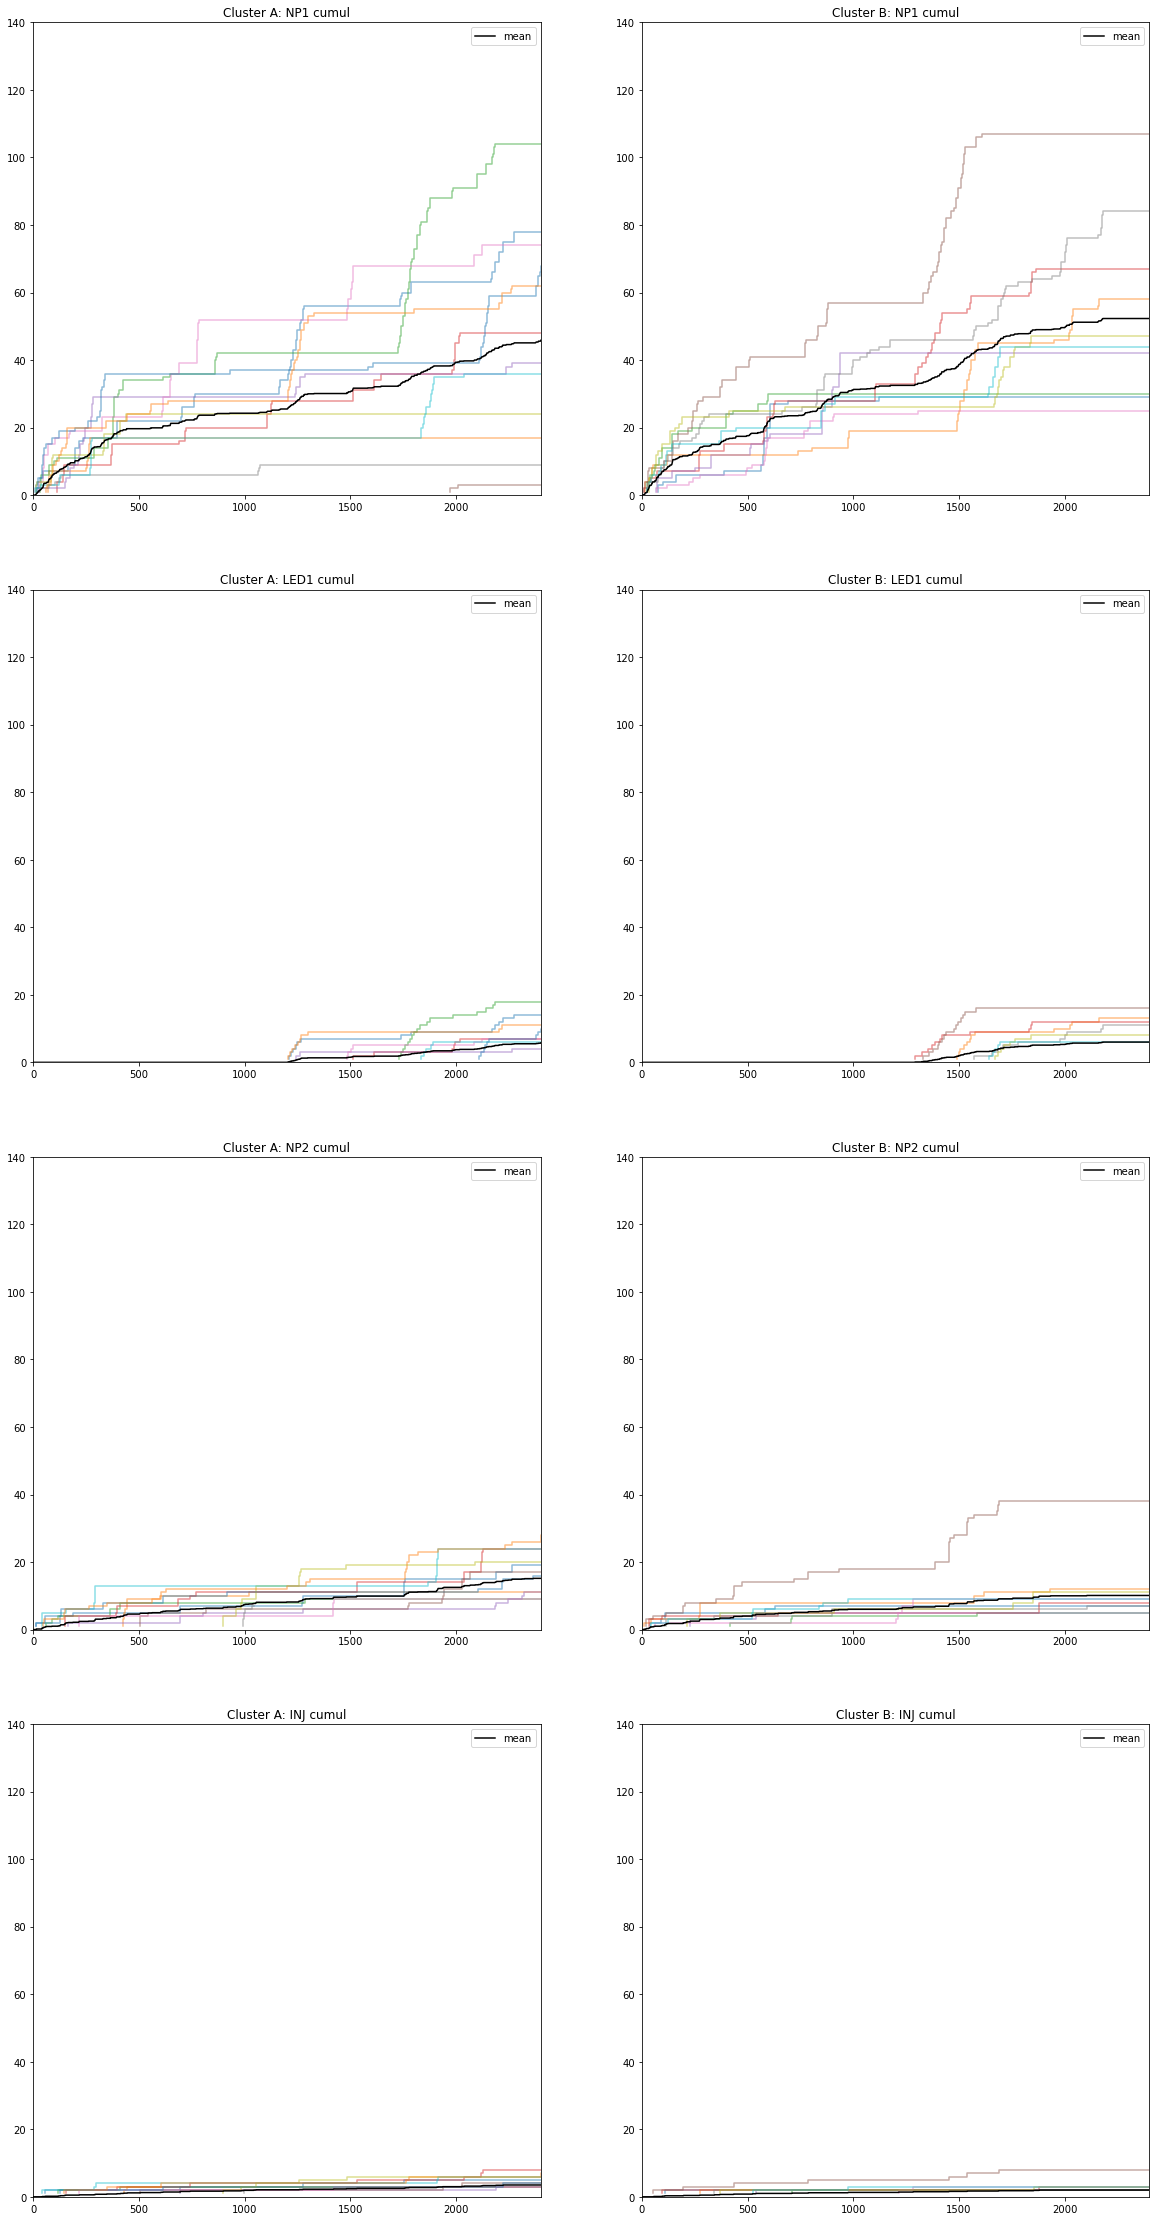

In [35]:
multiplot(selection)

In [ ]:
def nicotine_eventss(obj,convert=60):
    plt.figure(figsize=(20,3))
    plt.eventsplot(obj.np1/convert,color='r',linewidths=0.5,label='np1',lineoffset=1.5,linelengths=1)
    plt.eventsplot(obj.np2/convert,color='b',linewidths=0.5,label='np2',lineoffset=0.5,linelengths=1)
    plt.eventsplot(obj.led1_on/convert,color='y',linewidths=0.5,label='led1',lineoffset=2.5,linelengths=1)
    plt.eventsplot(obj.inj1/convert,color='k',linewidths=0.5,label='inj1',lineoffset=3.5,linelengths=1)
    plt.legend()
    plt.grid(which='both',axis='both')
    plt.ylim((0,4))
    plt.yticks([])

s35 = df[df['jour']==35].copy()
s36 = df[df['jour']==36].copy()
s39 = df[df['jour']==39].copy()

In [42]:
selection.loc[0,'np1']

0.453          1
9.594          2
10.281         3
11.326         4
33.306         5
            ... 
10396.359    229
10424.705    230
10581.158    231
10582.125    232
10723.290    233
Length: 233, dtype: int64

In [52]:
%ls

 Le volume dans le lecteur C s’appelle System
 Le numéro de série du volume est A698-0041

 Répertoire de C:\Users\mceau\Documents\fiberphotopy\fiberphotopy

22/04/2022  14:32    <DIR>          .
22/04/2022  14:32    <DIR>          ..
21/04/2022  09:48    <DIR>          .ipynb_checkpoints
16/03/2022  16:08                 0 __init__.py
21/04/2022  11:05    <DIR>          __pycache__
21/04/2022  09:48            17 667 analysis.py
21/04/2022  09:48            28 842 behavioral_data.py
21/04/2022  09:48            15 676 fiber_data.py
21/04/2022  09:48             1 737 fp_utils.py
21/04/2022  09:48             7 058 info.py
22/04/2022  14:32             6 603 mismatches.csv
               7 fichier(s)           77 583 octets
               4 Rép(s)  885 845 426 176 octets libres


In [64]:
def pplot(events,df,jour):
    a,b = events
    dic = {"np1":     ('NPA',   {"A":'chocolate',    "B":'chocolate'    }), #"B" : 'peru'       }),
           "np2":     ('NPB',   {"A":'darkturquoise',"B":'darkturquoise'}), #"B" : 'dodgerblue' }),
           "inj1":    ('INJ',   {"A":'darkblue',     "B":'darkblue'     }), #"B" : 'indigo'     }),
           "led1_on": ('LIGHT', {"A":'darkorange',   "B":'darkorange'   })} #"B" : 'goldenrod'  })}
    dataframe = df[df['jour']==jour].copy()
    dataframe.sort_values('cluster',inplace=True)
    sess = list(dataframe['jour'])[0]
    fig = plt.figure(figsize=(20,len(dataframe)))
    gs = fig.add_gridspec(len(dataframe), hspace=0)
    ax = gs.subplots(sharex=True, sharey=True)
    for n,rat in enumerate(dataframe.index):
        clust = dataframe.loc[rat,'cluster']
        col_a = colors.hex2color(colors.cnames[dic[a][1][clust]])
        col_b = colors.hex2color(colors.cnames[dic[b][1][clust]])
        title = f"R{dataframe.loc[rat,'Rat']} ({clust}) - S{sess}"
        #print(dataframe.loc[rat,events].index.values)
        a_data = np.array([i for i in dataframe.loc[rat,a].index.values])/60# if i < 2400])/60 ###
        b_data = np.array([i for i in dataframe.loc[rat,b].index.values])/60# if i < 2400])/60
        ax[n].eventplot(a_data,linelengths=1,lineoffsets=0.5,linewidth=0.7,label=dic[a][0],color=col_a)
        ax[n].eventplot(b_data,linelengths=1,lineoffsets=0.5,linewidth=0.7,label=dic[b][0],color=col_b)
        ax[n].legend()
        ax[n].set_xlim((0,180)) ###
        ax[n].set_ylim((0,1))
        ax[n].set_title(title,x=1.05, y=1.0, pad=-14)
        ax[n].axes.yaxis.set_visible(False)
    plt.savefig(f"C:\\Users\\mceau\\Documents\\DATA\\nicotine\\images\\{sess}_{a}_{b}_180.pdf",dpi=400) ###

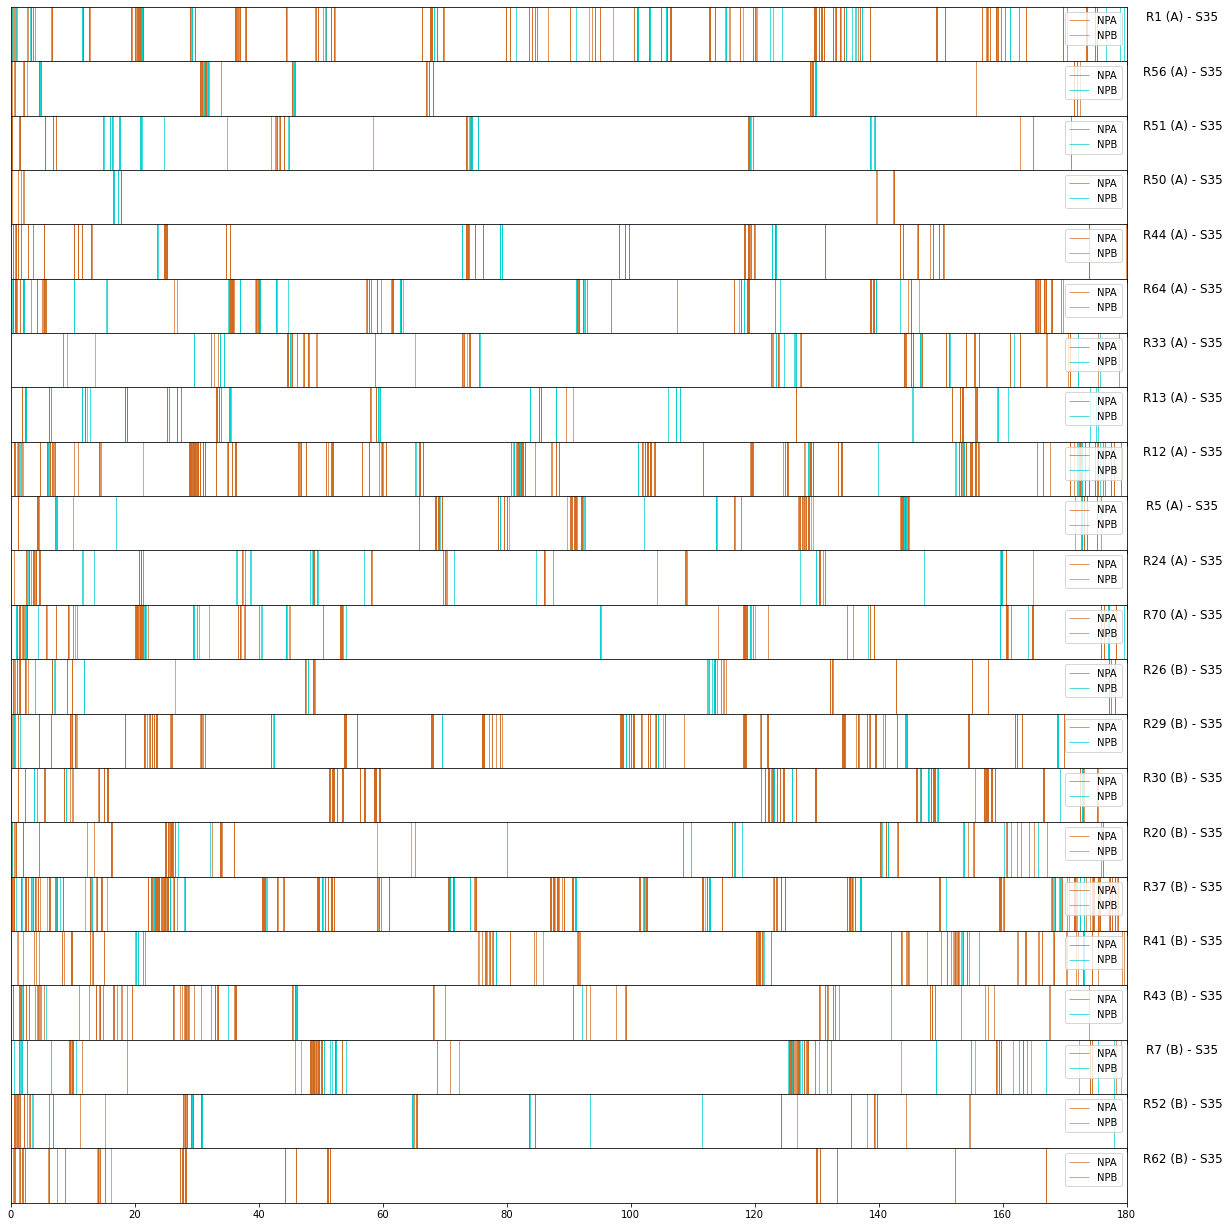

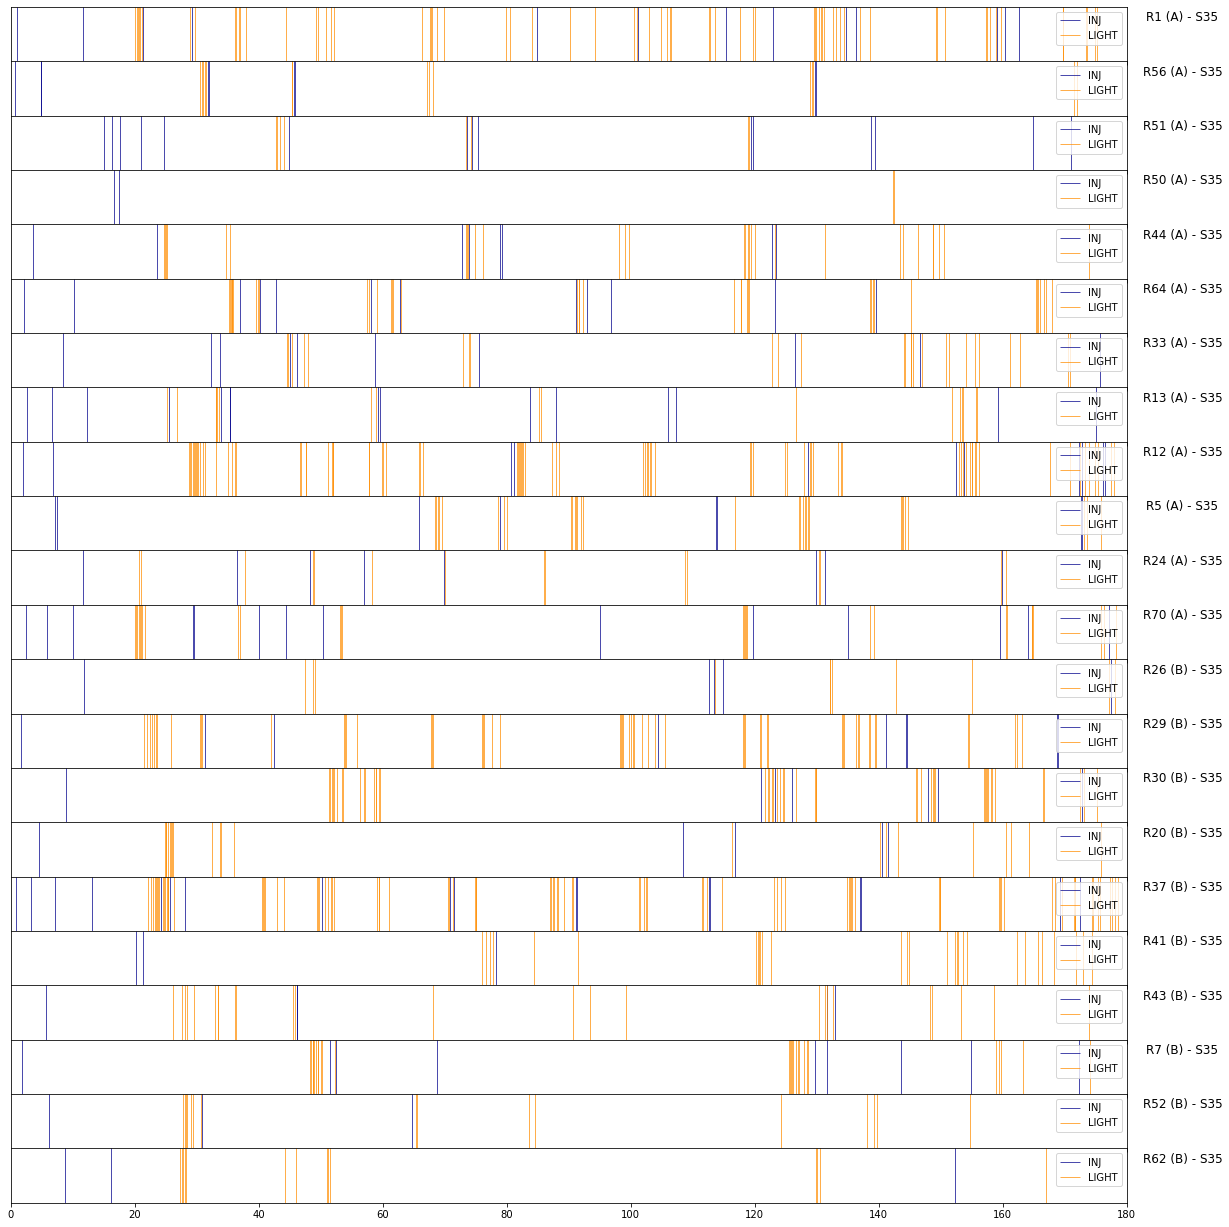

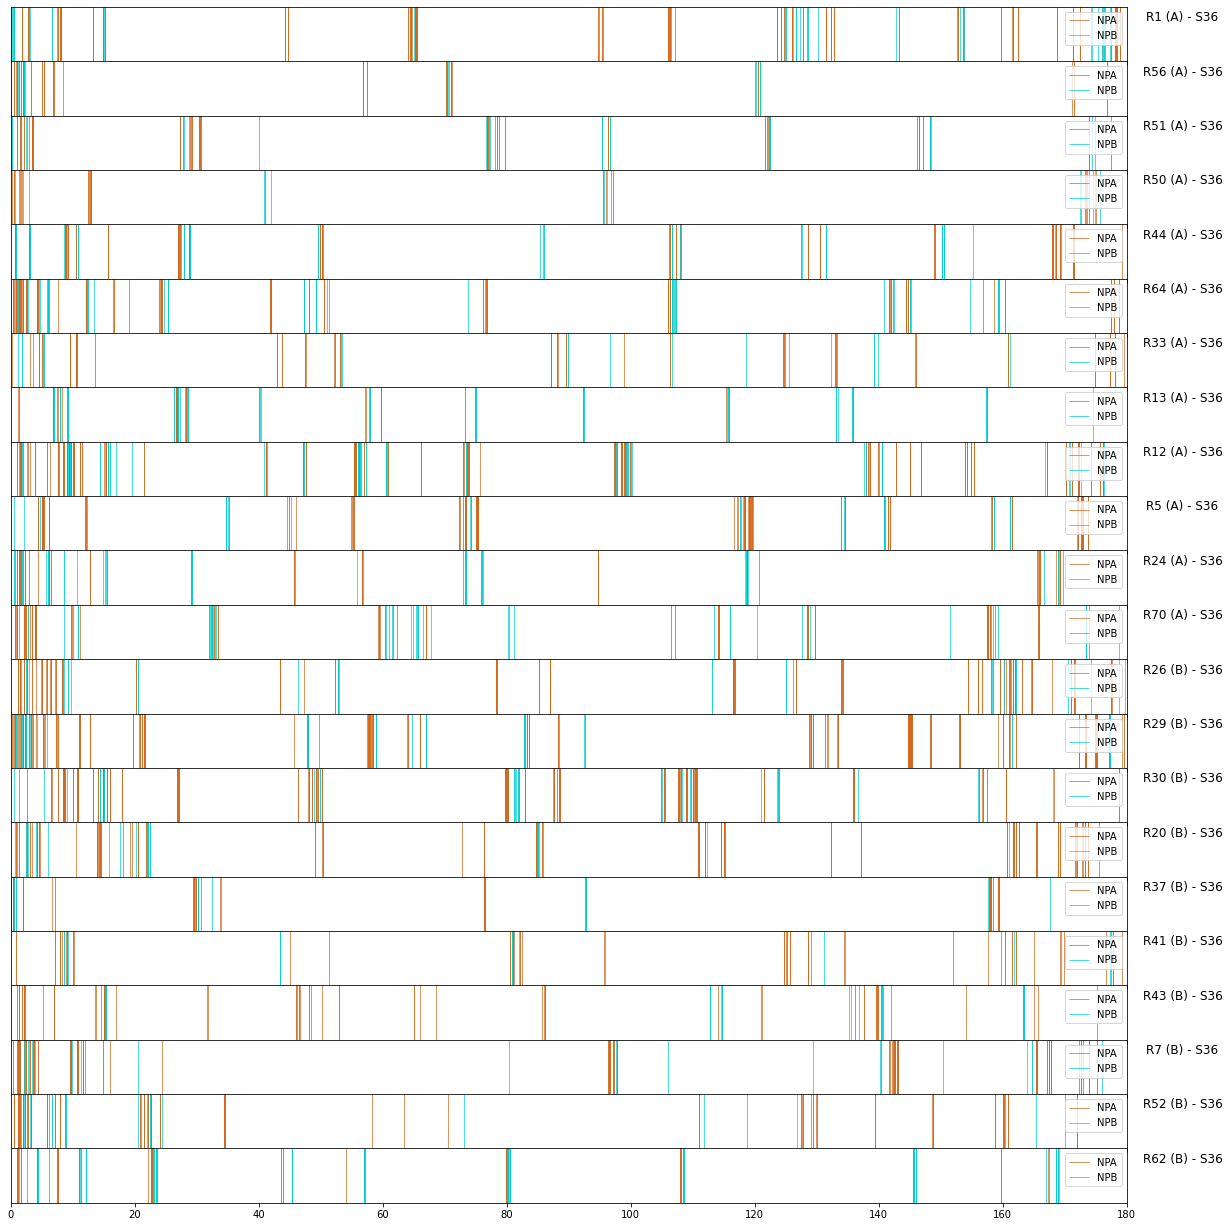

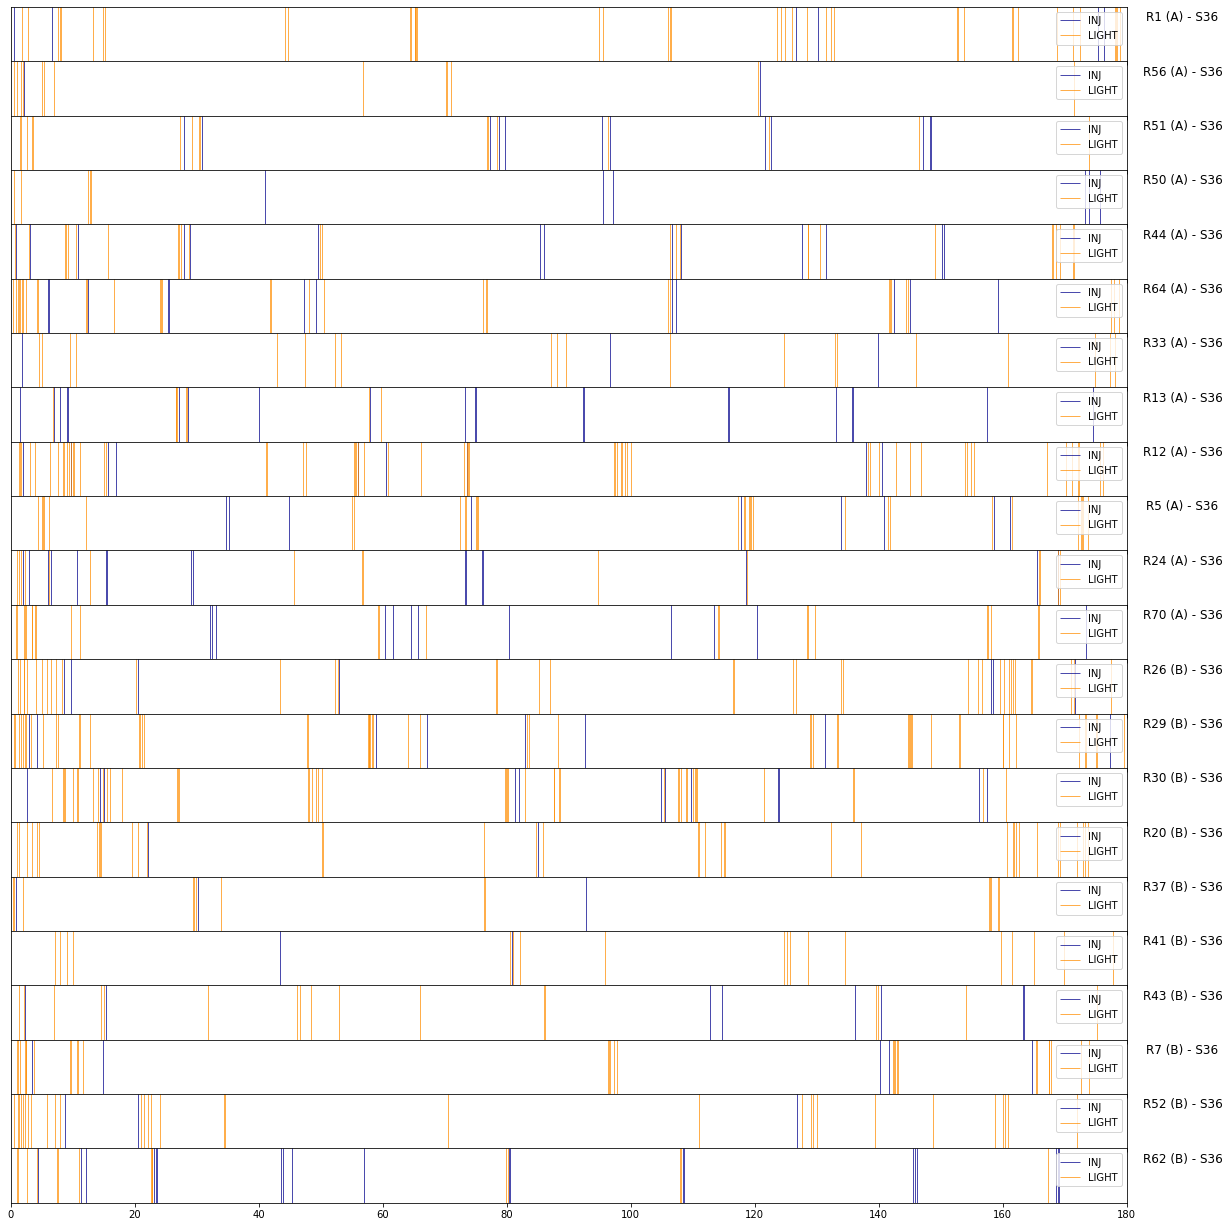

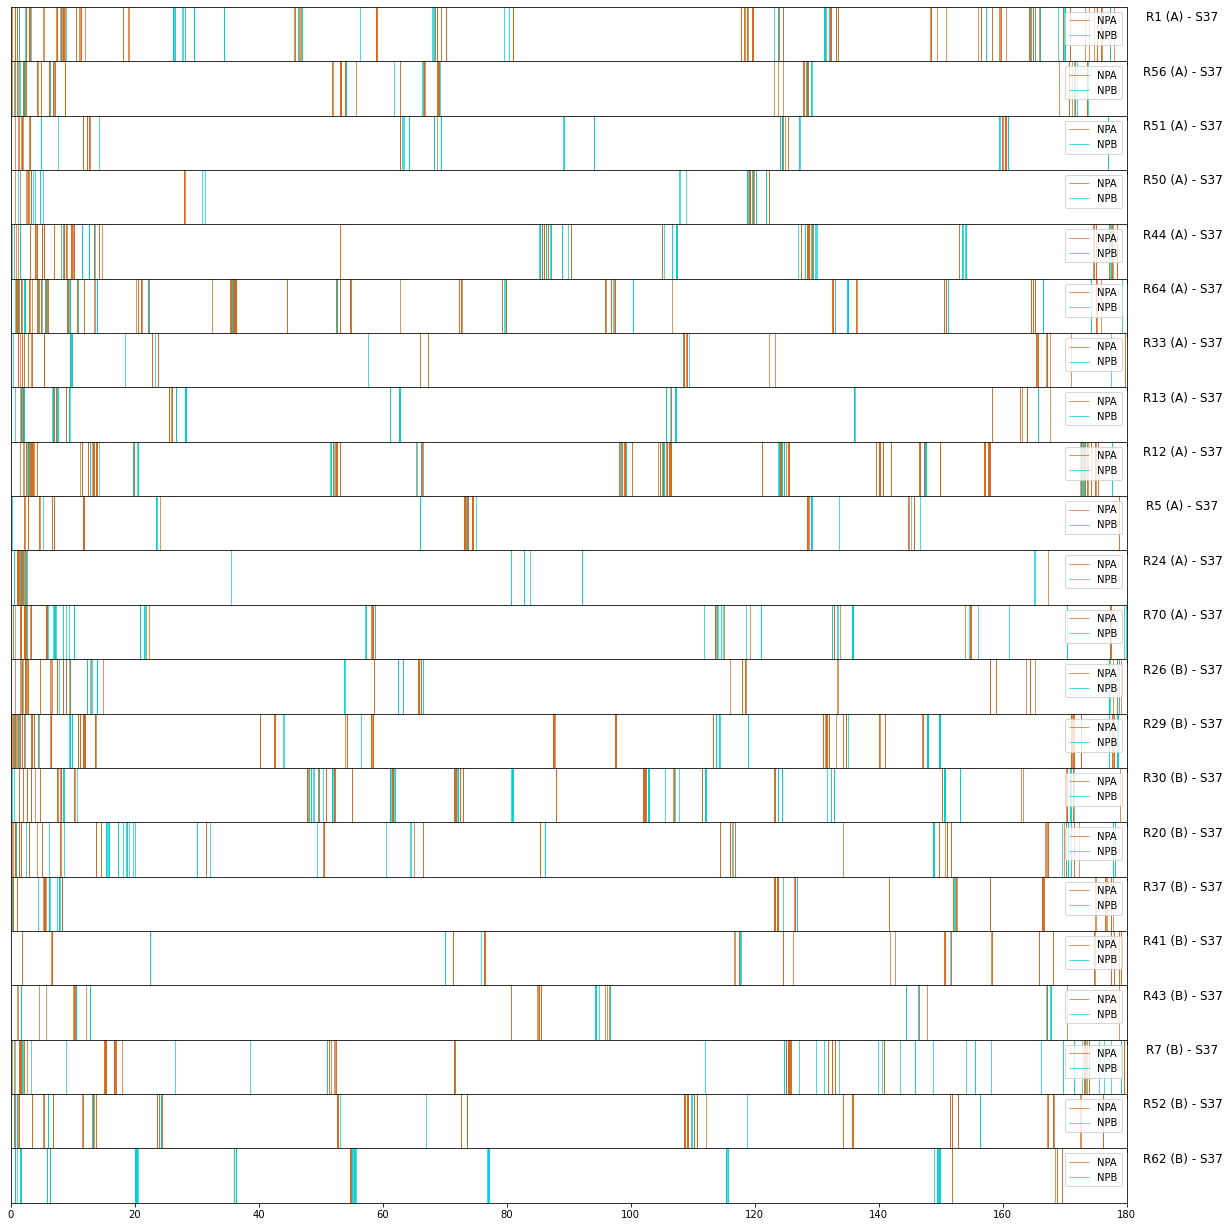

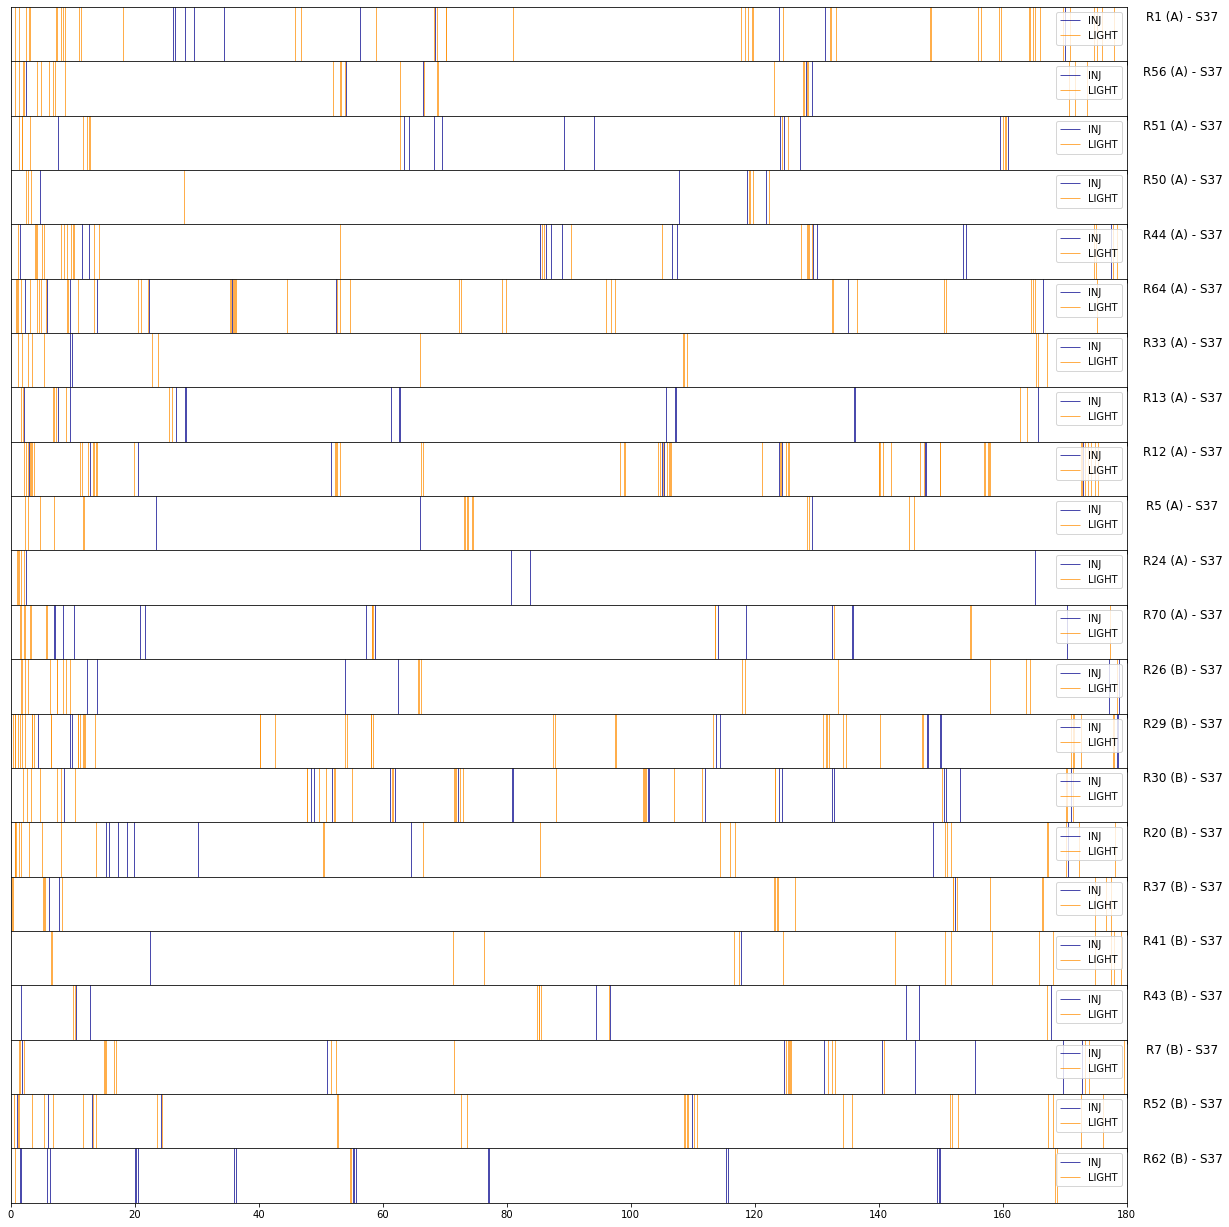

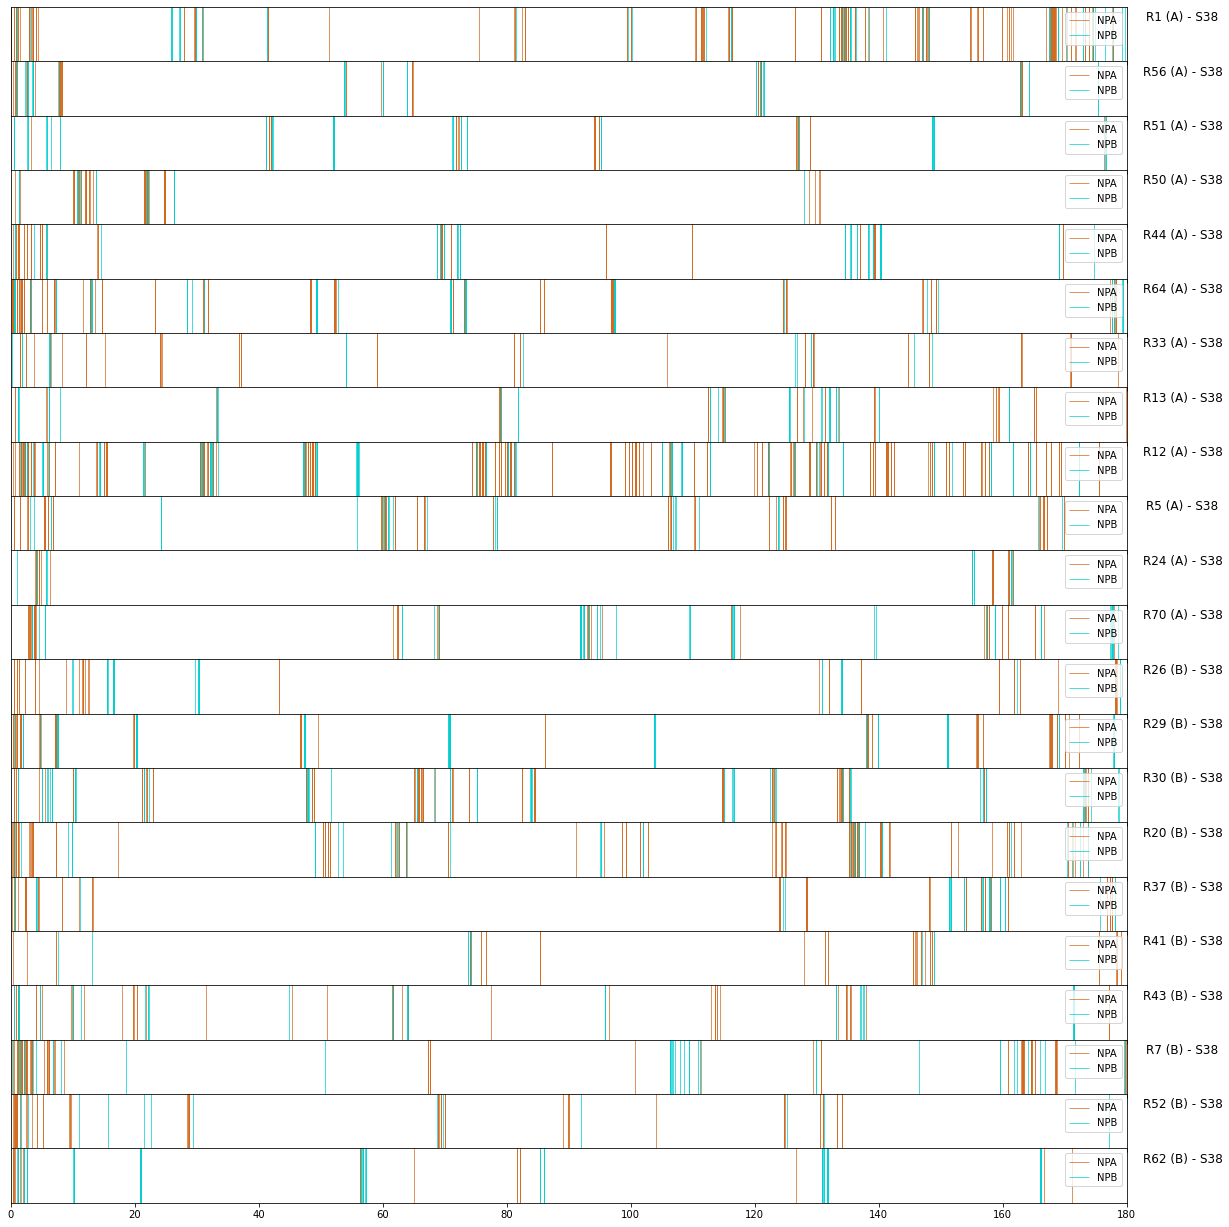

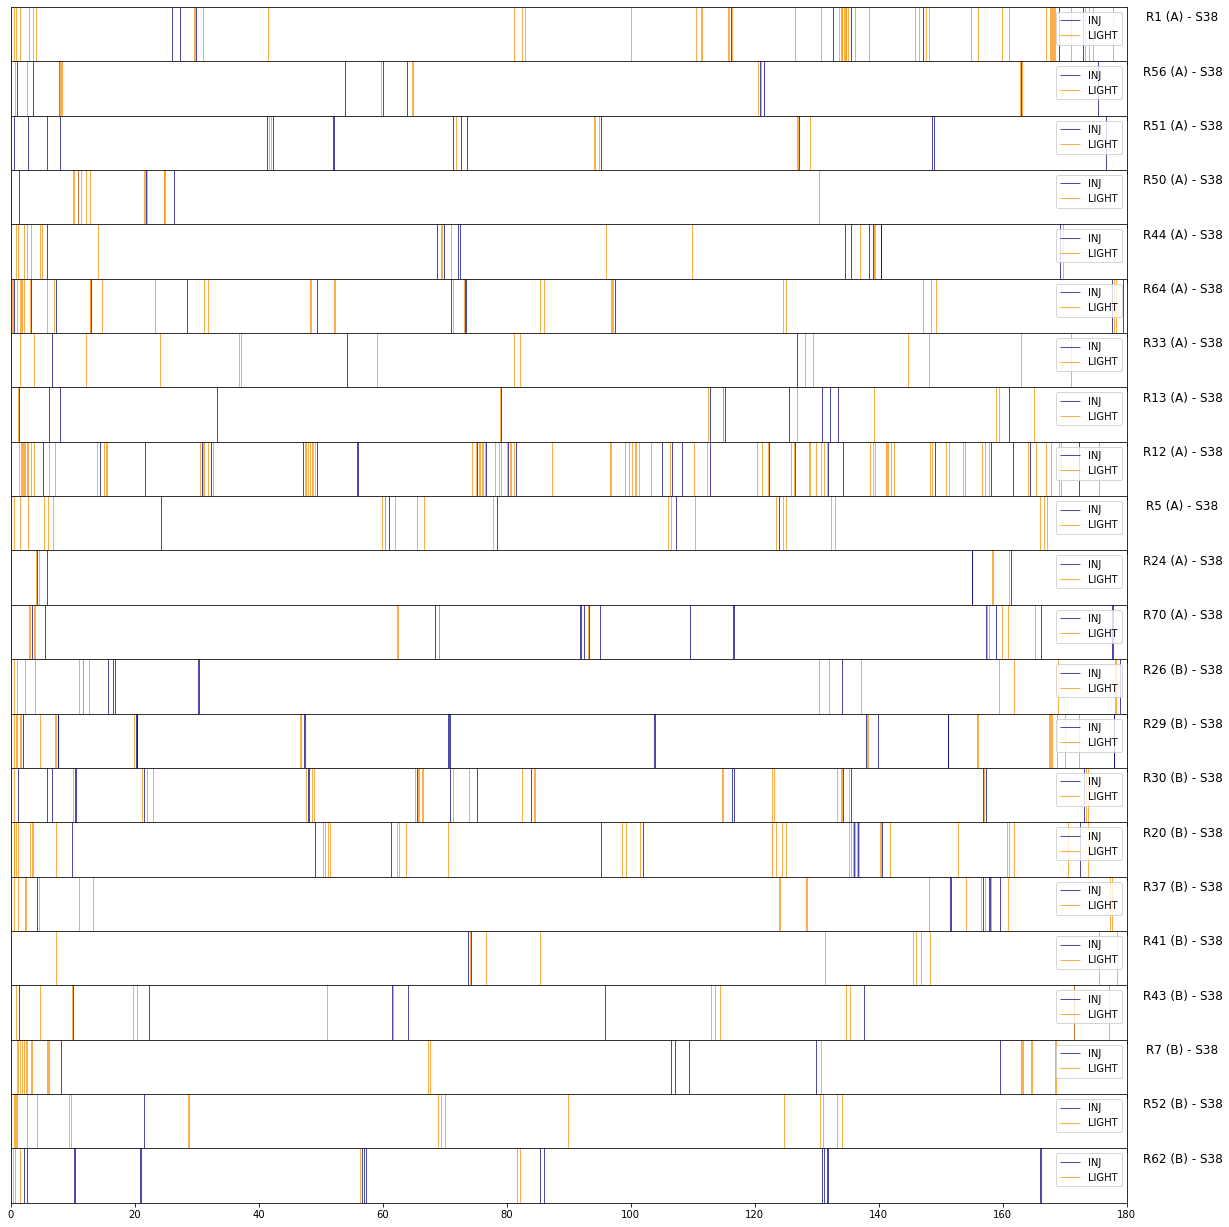

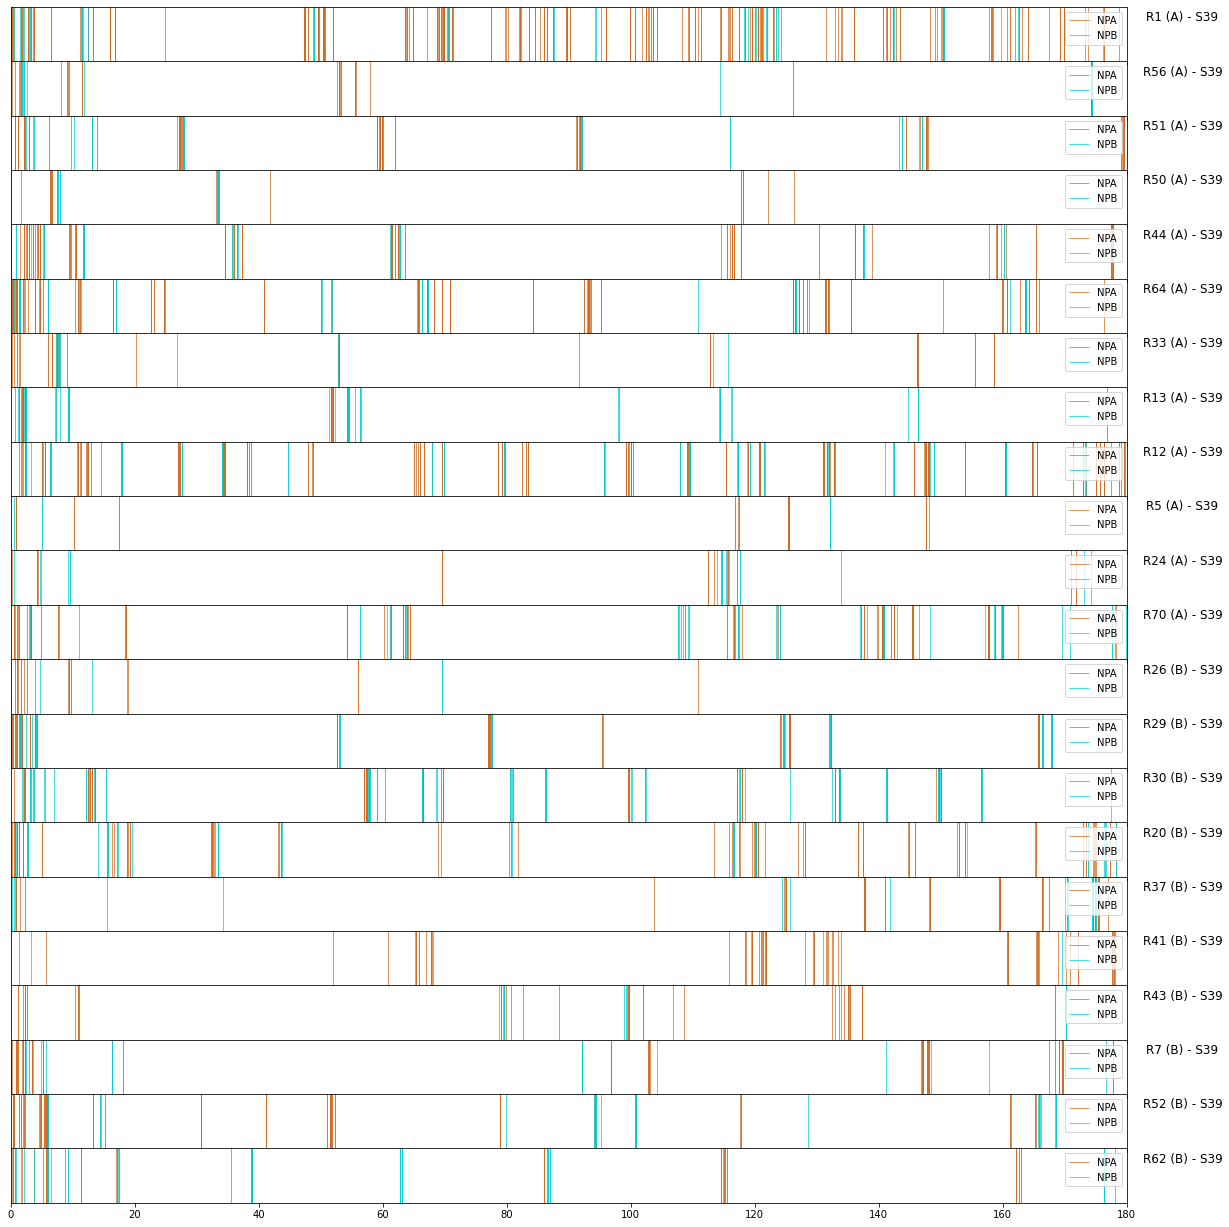

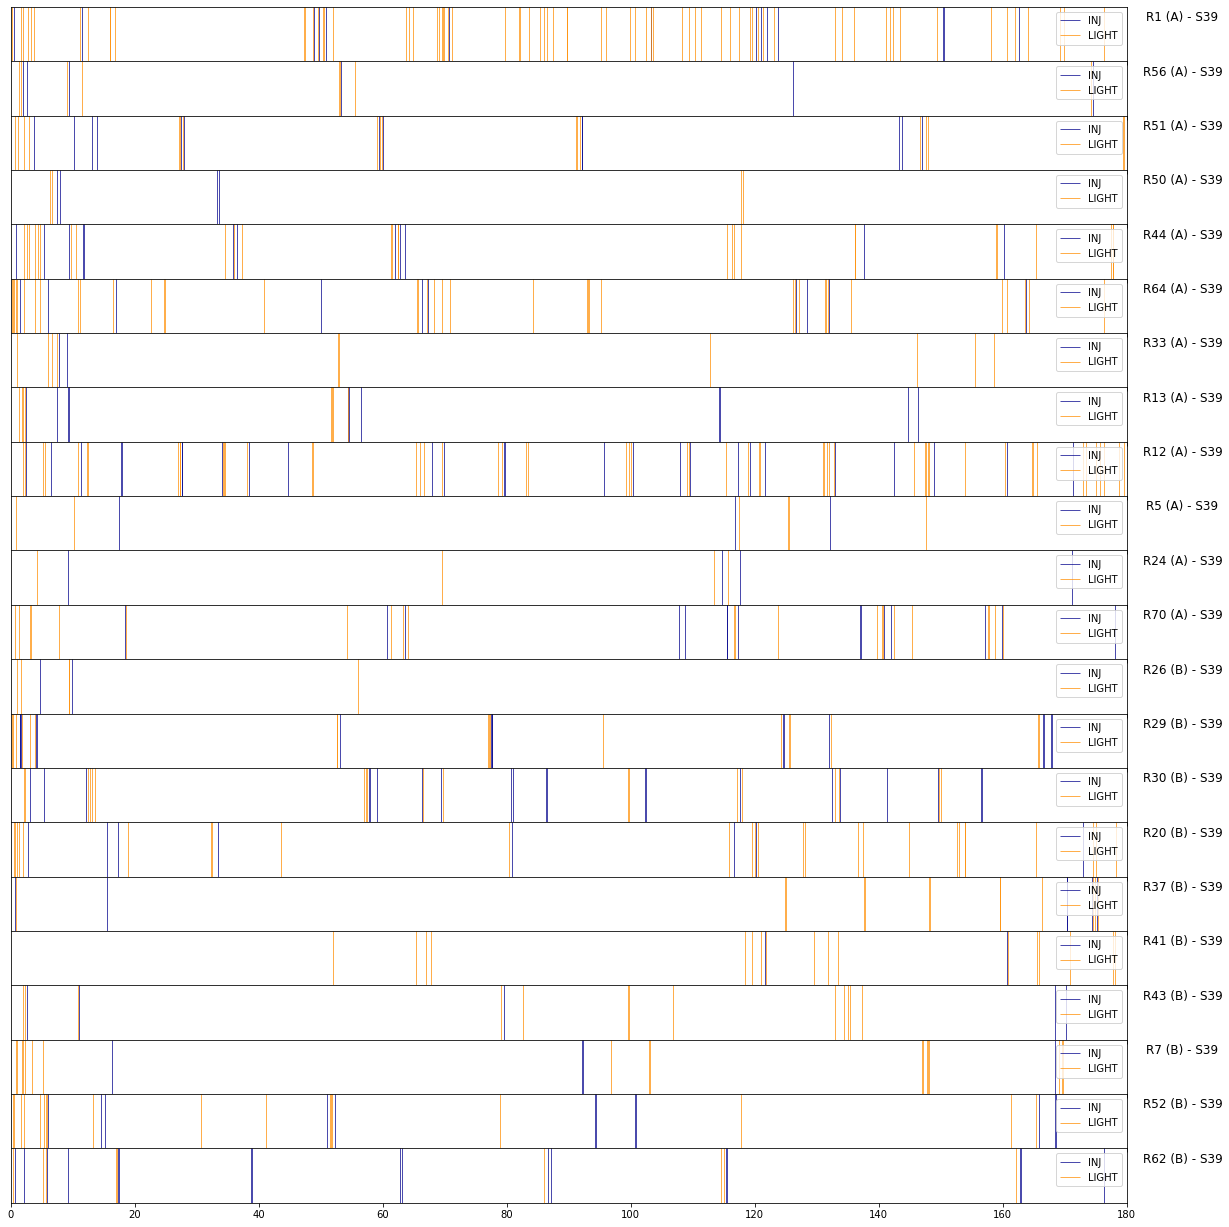

In [65]:
for jour in list(set(selection.jour)):
    for events in [("np1","np2"),("inj1","led1_on")]:
        pplot(events,selection,jour)

fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(2, hspace=0)
ax = gs.subplots(sharex=True, sharey=True)
data = np.array([i for i in s35.loc[0,'np1'].index.values if i < 2400])/60
ax[1].eventsplot(data,linelengths=1,lineoffsets=0.5,colors='r',linewidth=0.6,label='np1')
ax[1].legend()
ax[1].set_xlim((0,40))
ax[1].set_ylim((0,1))
ax[1].set_title( 'titre',x=1.02, y=1.0, pad=-14)
ax[1].axes.yaxis.set_visible(False)

In [72]:
reponses= "Renforçateurs"
lat = f"""
\\section{{{reponses}}}

\\subsection{{{reponses} - 40 min}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 40 min - session 35}}]
\\{{pictures/35_np1_np2.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 40 min - session 36}}]
{{pictures/36_np1_np2.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 40 min - session 37}}]
{{pictures/37_np1_np2.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 40 min - session 38}}]
{{pictures/38_np1_np2.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 40 min - session 39}}]
{{pictures/39_np1_np2.pdf}}

\\subsection{{{reponses} - 180 min}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 180 min - session 35}}]
{{pictures/35_np1_np2_180.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 180 min - session 36}}]
{{pictures/36_np1_np2_180.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 180 min - session 37}}]
{{pictures/37_np1_np2_180.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 180 min - session 38}}]
{{pictures/38_np1_np2_180.pdf}}
\\includepdf[scale=1,pages=1,pagecommand=
\\subsubsection{{{reponses} - 180 min - session 39}}]
{{pictures/39_np1_np2_180.pdf}}
"""
print(lat)


\section{Renforçateurs}

\subsection{Renforçateurs - 40 min}
\includepdf[scale=1,pages=1,pagecommand=
\subsubsection{Renforçateurs - 40 min - session 35}]
\{pictures/35_np1_np2.pdf}
\includepdf[scale=1,pages=1,pagecommand=
\subsubsection{Renforçateurs - 40 min - session 36}]
{pictures/36_np1_np2.pdf}
\includepdf[scale=1,pages=1,pagecommand=
\subsubsection{Renforçateurs - 40 min - session 37}]
{pictures/37_np1_np2.pdf}
\includepdf[scale=1,pages=1,pagecommand=
\subsubsection{Renforçateurs - 40 min - session 38}]
{pictures/38_np1_np2.pdf}
\includepdf[scale=1,pages=1,pagecommand=
\subsubsection{Renforçateurs - 40 min - session 39}]
{pictures/39_np1_np2.pdf}

\subsection{Renforçateurs - 180 min}
\includepdf[scale=1,pages=1,pagecommand=
\subsubsection{Renforçateurs - 180 min - session 35}]
{pictures/35_np1_np2_180.pdf}
\includepdf[scale=1,pages=1,pagecommand=
\subsubsection{Renforçateurs - 180 min - session 36}]
{pictures/36_np1_np2_180.pdf}
\includepdf[scale=1,pages=1,pagecommand=
\subsubs

In [108]:
def latex_output():
    printlist = []
    for day in range(35,40):
        fdf = selection[selection.jour==day].copy()
        df = fdf[['Rat','real_cage','jour','session','date','filename']].sort_values(['Rat','jour'])
        df.columns = ['Rat','Cage','J','S','Date','Fichier']
        printlist.append(f'\\subsection{{Correspondance J{day}}}\n')
        printlist.append(df.to_latex(index=False))
    print('\n\n'.join(printlist))
latex_output()

\subsection{Correspondance J35}


\begin{tabular}{rlrrll}
\toprule
 Rat & Cage &  J &  S &       Date &                          Fichier \\
\midrule
   1 &   1a & 35 &  1 & 08/04/2019 & J35\textbackslash J35a\textbackslash asa08042019s1c01\_01.dat \\
   5 &   5a & 35 &  1 & 08/04/2019 & J35\textbackslash J35a\textbackslash asa08042019s1c05\_01.dat \\
   7 &   7a & 35 &  1 & 08/04/2019 & J35\textbackslash J35a\textbackslash asa08042019s1c07\_01.dat \\
  12 &  12a & 35 &  1 & 08/04/2019 & J35\textbackslash J35a\textbackslash asa08042019s1c12\_01.dat \\
  13 &  13a & 35 &  1 & 08/04/2019 & J35\textbackslash J35a\textbackslash asa08042019s1c13\_01.dat \\
  20 &   4b & 35 &  1 & 08/04/2019 & J35\textbackslash J35b\textbackslash bsa08042019s1c04\_01.dat \\
  24 &   8b & 35 &  1 & 08/04/2019 & J35\textbackslash J35b\textbackslash bsa08042019s1c08\_01.dat \\
  26 &   1c & 35 &  1 & 08/04/2019 & J35\textbackslash J35c\textbackslash csa08042019s1c01\_01.dat \\
  29 &   3c & 35 &  1 & 08/04/2019 

In [47]:
s2 = selection.copy()

In [48]:
%ls


 Le volume dans le lecteur C s’appelle System
 Le numéro de série du volume est A698-0041

 Répertoire de C:\Users\mceau\Documents\fiberphotopy\fiberphotopy

04/05/2022  09:54    <DIR>          .
04/05/2022  09:54    <DIR>          ..
21/04/2022  09:48    <DIR>          .ipynb_checkpoints
16/03/2022  16:08                 0 __init__.py
04/05/2022  09:54    <DIR>          __pycache__
03/05/2022  15:51            19 086 analysis.py
04/05/2022  09:54            28 402 behavioral_data.py
03/05/2022  12:06            15 609 fiber_data.py
03/05/2022  11:25             3 505 fp_utils.py
29/04/2022  12:03             7 060 info.py
22/04/2022  14:32             6 603 mismatches.csv
               7 fichier(s)           80 265 octets
               4 Rép(s)  888 658 984 960 octets libres


In [49]:
s2.to_pickle('../dev/nicotine.pickle')

In [50]:
stest = pd.read_pickle('../dev/nicotine.pickle')

In [57]:
stest.drop(columns=['Subgroup','Group','path','objects','np1','np2','cage'],inplace=True)

In [74]:
stest['latency to INJ'] = [list(a.index)[0] for a in stest.inj1]

In [78]:
stest.sort_values(['jour','Rat'],inplace=True)

In [220]:

def interval(n):
    A = stest.loc[n,'led1_on'].index.to_numpy()
    B = stest.loc[n,'inj1'].index.to_numpy()
    if A[0] > B[0]:
        a = B ; b = A
        invert = True
    else:
        invert = False
        a = A ; b = B
    a_int = []
    for i in a:
        bt = b[b>i]
        try:
            at = a[a>bt[0]]
            bt = b[(b>i) & (b<at[0])]
        except:
            try:
                at = a
                bt = b[(b>i)]
            except:
                break
        for j in bt:
            a_int.append((i,j))
    c = b ; b = a ; a = c
    a = a[a>b[0]]
    b_int = []
    for i in a:
        bt = b[b>i]
        try:
            at = a[a>bt[0]]
            bt = b[(b>i) & (b<at[0])]
        except:
            try:
                at = a
                bt = b[(b>i)]
            except:
                break
        for j in bt:
            b_int.append((i,j))
#    plt.figure(figsize=(20,10))
#    plt.eventplot(A,lineoffsets=125,linelengths=10,color='b',label='CS')
#    plt.eventplot(B,lineoffsets=135,linelengths=10,color='r',label='INJ')
#    for n,(i1,i2) in enumerate(a_int):
#        plt.plot([i1,i2],[n,n],color='r',label='_'*n+'INJ-CS')
#    for n,(i1,i2) in enumerate(b_int):
#        plt.plot([i1,i2],[n-10,n-10],color='b',label='_'*n+'CS-INJ')
#    plt.legend()
    X1,X2 = np.mean([abs(x1-x2) for x1,x2 in a_int]),np.mean([abs(x1-x2) for x1,x2 in b_int])
    X1,X2 = np.round(X1,3),np.round(X2,3)
    if invert:
        return X2,X1
    else:
        return X1,X2

interval(96)

(935.213, 1782.693)

In [224]:
def interval20(n):
    A = np.array([i for i in stest.loc[n,'led1_on'].index.to_numpy() if i > 20*60])
    B = np.array([i for i in stest.loc[n,'inj1'].index.to_numpy()    if i > 20*60])
    if len(A) and len(B):
        if A[0] > B[0]:
            invert = True
            a = B ; b = A
        else:
            invert = False
            a = A ; b = B
        a_int = []
        for i in a:
            bt = b[b>i]
            try:
                at = a[a>bt[0]]
                bt = b[(b>i) & (b<at[0])]
            except:
                try:
                    at = a
                    bt = b[(b>i)]
                except:
                    break
            for j in bt:
                a_int.append((i,j))
        c = b ; b = a ; a = c
        a = a[a>b[0]]
        b_int = []
        for i in a:
            bt = b[b>i]
            try:
                at = a[a>bt[0]]
                bt = b[(b>i) & (b<at[0])]
            except:
                try:
                    at = a
                    bt = b[(b>i)]
                except:
                    break
            for j in bt:
                b_int.append((i,j))
        #plt.eventplot(A,lineoffsets=95,linelengths=10,color='b',label='CS')
        #plt.eventplot(B,lineoffsets=105,linelengths=10,color='r',label='INJ')
        #for n,(i1,i2) in enumerate(a_int):
        #    plt.plot([i1,i2],[n,n],color='r',label='_'*n+'INJ-CS')
        #for n,(i1,i2) in enumerate(b_int):
        #    plt.plot([i1,i2],[n-10,n-10],color='b',label='_'*n+'CS-INJ')
        #plt.legend()  
        X1,X2 = np.mean([abs(x1-x2) for x1,x2 in a_int]),np.mean([abs(x1-x2) for x1,x2 in b_int])
        X1,X2 = np.round(X1,3),np.round(X2,3)
        if invert:
            return X2,X1
        else:
            return X1,X2
    else:
        return np.nan,np.nan

In [227]:
dist   = [interval(i) for i in stest.index]
dist20 = [interval20(i) if stest.loc[i,'jour']==35 else (np.nan,np.nan) for i in stest.index]
stest['CS_INJ']   = [a for a,b in dist]
stest['INJ_CS']   = [b for a,b in dist]
stest['CS_INJ20'] = [a for a,b in dist20]
stest['INJ_CS20'] = [b for a,b in dist20]

C:\Users\mceau\AppData\Local\Temp/ipykernel_9660/4179874494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stest['CS_INJ']   = [a for a,b in dist]
C:\Users\mceau\AppData\Local\Temp/ipykernel_9660/4179874494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stest['INJ_CS']   = [b for a,b in dist]
C:\Users\mceau\AppData\Local\Temp/ipykernel_9660/4179874494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [228]:
res = stest[['date','Rat', 'jour', 'real_cage', 'cluster','CS_INJ','INJ_CS','CS_INJ20','INJ_CS20', 'distance','distance20','latency to INJ','filename']]

In [229]:
res.sort_values('cluster').to_excel('t.xls')

C:\Users\mceau\AppData\Local\Temp/ipykernel_9660/3646044368.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  res.sort_values('cluster').to_excel('t.xls')


In [190]:
a = res[res.jour != 35]

In [196]:
a[a.cluster == 'A']['distance'].to_numpy().mean()

1636.5253541666664

In [197]:
a[a.cluster == 'B']['distance'].to_numpy().mean()

1736.6308250000002

In [200]:
res[res.jour == 38]

date  Rat  jour real_cage cluster  distance  distance20  \
70   11/04/2022    1    38        1a       A   964.159         NaN   
74   11/04/2022    5    38        5a       A   927.049         NaN   
76   11/04/2022    7    38        7a       B  1202.899         NaN   
81   11/04/2022   12    38       12a       A   322.405         NaN   
82   11/04/2022   13    38       13a       A  1051.311         NaN   
89   11/04/2022   20    38        4b       B   944.663         NaN   
93   11/04/2022   24    38        8b       A  2803.673         NaN   
94   11/04/2022   26    38        1c       B  1847.489         NaN   
96   11/04/2022   29    38        3c       B  1358.953         NaN   
97   11/04/2022   30    38        4c       B   546.401         NaN   
100  11/04/2022   33    38        7c       A  1472.071         NaN   
104  11/04/2022   37    38       11c       B  2481.942         NaN   
107  11/04/2022   41    38        3a       B  3162.655         NaN   
109  11/04/2022   43    38        5a       B  1489.372         NaN   
110  11/04/2022   44    38        6a       A   693.406         NaN   
116  11/04/2022   50    38       12a       A   497.754         NaN   
117  11/04/2022   51    38       13a       A  1109.205         NaN   
118  11/04/2022   52    38       14a       B  2893.431         NaN   
122  11/04/2022   56    38        2b       A   911.138         NaN   
128  11/04/2022   62    38        8b       B  1661.178         NaN   
130  11/04/2022   64    38        2c       A   675.076         NaN   
136  11/04/2022   70    38        8c       A  1173.987         NaN   

     latency to INJ                          filename  
70         1557.187  J38\J38a\asa11042019s1c01_01.dat  
74         1453.087  J38\J38a\asa11042019s1c05_01.dat  
76          483.493  J38\J38a\asa11042019s1c07_01.dat  
81          315.824  J38\J38a\asa11042019s1c12_01.dat  
82           76.190  J38\J38a\asa11042019s1c13_01.dat  
89          596.345  J38\J38b\bsa11042019s1c04_01.dat  
93          258.588  J38\J38b\bsa11042019s1c08_01.dat  
94          936.895  J38\J38c\csa11042019s1c01_01.dat  
96          116.236  J38\J38c\csa11042019s1c03_01.dat  
97           74.740  J38\J38c\csa11042019s1c04_01.dat  
100         395.088  J38\J38c\csa11042019s1c07_01.dat  
104         252.332  J38\J38c\csa11042019s1c11_01.dat  
107        4428.089  J38\J38a\asa11042019s2c03_01.dat  
109          77.142  J38\J38a\asa11042019s2c05_01.dat  
110         354.700  J38\J38a\asa11042019s2c06_01.dat  
116          81.198  J38\J38a\asa11042019s2c12_01.dat  
117          36.536  J38\J38a\asa11042019s2c13_01.dat  
118        1286.181  J38\J38a\asa11042019s2c14_01.dat  
122          62.931  J38\J38b\bsa11042019s2c02_01.dat  
128         126.720  J38\J38b\bsa11042019s2c08_01.dat  
130          35.350  J38\J38c\csa11042019s2c02_01.dat  
136         208.885  J38\J38c\csa11042019s2c08_01.dat

In [208]:
stest['n'] = [len(i) for i in stest.loc[:,'inj1']]

C:\Users\mceau\AppData\Local\Temp/ipykernel_9660/4109585608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stest['n'] = [len(i) for i in stest.loc[:,'inj1']]


In [212]:
stest.sort_values('n',ascending=False).head(10)

date  Rat  jour real_cage cluster  latency to INJ  \
11   12/04/2019   12    39       12a       A         150.931   
81   11/04/2022   12    38       12a       A         315.824   
222  09/04/2019   13    36       13a       A          85.363   
27   12/04/2019   30    39        4c       B         190.243   
268  09/04/2019   62    36        8b       B         268.665   
167  10/04/2019   30    37        4c       B         513.930   
97   11/04/2022   30    38        4c       B          74.740   
198  10/04/2019   62    37        8b       B          91.276   
96   11/04/2022   29    38        3c       B         116.236   
314  08/04/2019   37    35       11c       B          54.007   

                                                  inj1  \
11   150.931       1
385.619       2
682.723       ...   
81   315.824       1
860.642       2
1296.369      ...   
222  85.363        1
418.847       2
481.138       ...   
27   190.243      1
327.087      2
731.379      3
3...   
268  268.665       1
677.824       2
730.599       ...   
167  513.930       1
2903.319      2
2934.254      ...   
97   74.740        1
353.873       2
402.108       ...   
198  91.276       1
98.873       2
349.551      3
3...   
96   116.236       1
453.495       2
461.857       ...   
314  54.007        1
195.797       2
433.059       ...   

                                               led1_on  session  \
11   115.051       1
137.593       2
308.929       ...        1   
81   76.425        1
98.437        2
104.755       ...        1   
222  408.067     1
1597.699    2
1603.175    3
1610...        1   
27   126.142      1
137.000      2
747.775      3
7...        1   
268  59.202        1
72.244        2
153.895       ...        2   
167  119.435       1
157.015       2
196.156       ...        1   
97   29.422        1
603.802       2
1272.484      ...        1   
198  44.881       1
3286.333     2
3297.206     3
1...        2   
96   28.455        1
47.050        2
61.028        ...        1   
314  1330.330      1
1358.363      2
1375.133      ...        1   

                             filename  distance  distance20   n  
11   J39\J39a\asa12042019s1c12_01.dat   361.662         NaN  26  
81   J38\J38a\asa11042019s1c12_01.dat   322.405         NaN  26  
222  J36\J36a\asa09042019s1c13_01.dat  1384.146         NaN  21  
27   J39\J39c\csa12042019s1c04_01.dat  1045.814         NaN  21  
268  J36\J36b\bsa09042019s2c08_01.dat  1152.238         NaN  20  
167  J37\J37c\csa10042019s1c04_01.dat   509.651         NaN  20  
97   J38\J38c\csa11042019s1c04_01.dat   546.401         NaN  19  
198  J37\J37b\bsa10042019s2c08_01.dat  2781.746         NaN  19  
96   J38\J38c\csa11042019s1c03_01.dat  1358.953         NaN  19  
314  J35\J35c\csa08042019s1c11_01.dat   647.373     591.883  18